**Подключение библиотек и скриптов**

In [84]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
matplotlib.rcParams.update({'font.size': 14})

**Загрузка данных**

In [85]:
df_train = pd.read_csv('/content/drive/MyDrive/ОБУЧЕНИЕ В GB. МАТЕРИАЛЫ/Модуль 3/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/ОБУЧЕНИЕ В GB. МАТЕРИАЛЫ/Модуль 3/test.csv')

In [86]:
df_train.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


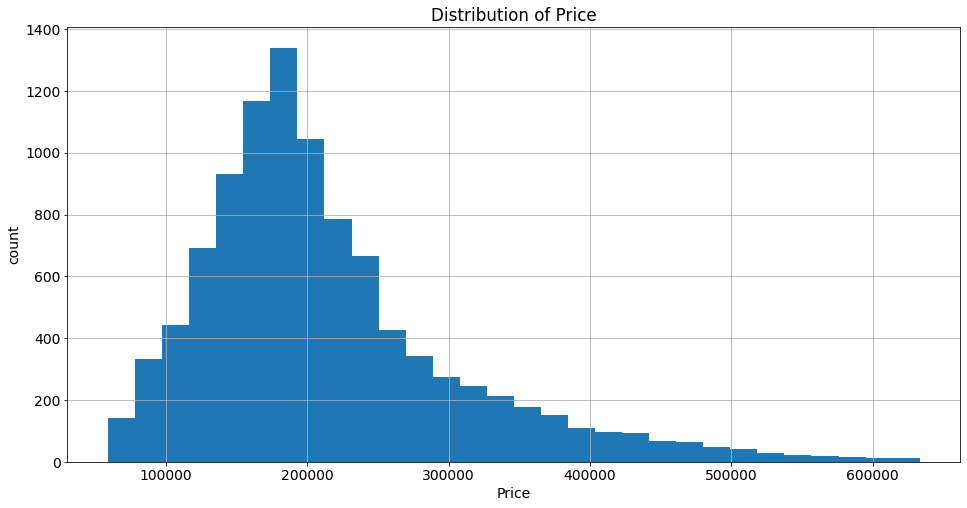

In [87]:
## распределение целевой переменной
plt.figure(figsize = (16, 8))

df_train['Price'].hist(bins=30)
plt.ylabel('count')
plt.xlabel('Price')

plt.title('Distribution of Price')
plt.show()

In [88]:
target_mean = round(df_train['Price'].mean(), 2)
target_median = df_train['Price'].median()
target_mode = df_train['Price'].mode()[0]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


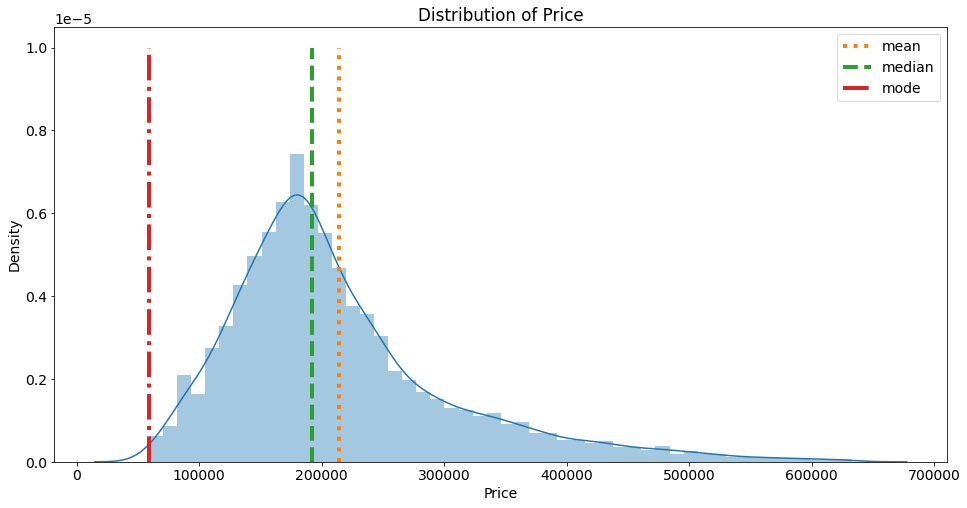

In [89]:
plt.figure(figsize = (16, 8))

sns.distplot(df_train['Price'], bins=50)

y = np.linspace(0, 0.00001, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

In [90]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


**Очевидно, что максимальные показатели LifeSquare и KitchenSquare превосходят максимальные значения Square, что не может быть, посмотрим сколько всего таких явных выбросов**

## Очистка данных и EDA

In [91]:
df_train[(df_train['LifeSquare'] > 640) | (df_train['KitchenSquare'] > 640)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,NaN,0,0,B,217357.492366
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275


In [92]:
df_shape = df_train.shape

In [93]:
## всего таких строкИ 3, удалим их по индексам и проверим какая часть таблицы удалена
df_train.drop(labels = [1064, 4328, 8584],axis = 0, inplace = True)
(df_shape[0]-df_train.shape[0])/df_shape[0]

0.0003

In [94]:
## Также удалим первый столбец, вряд ли он несет особую смысловую нагрузку
df_train=df_train.drop(labels='Id',axis=1)

In [95]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     9997 non-null   int64  
 1   Rooms          9997 non-null   float64
 2   Square         9997 non-null   float64
 3   LifeSquare     7884 non-null   float64
 4   KitchenSquare  9997 non-null   float64
 5   Floor          9997 non-null   int64  
 6   HouseFloor     9997 non-null   float64
 7   HouseYear      9997 non-null   int64  
 8   Ecology_1      9997 non-null   float64
 9   Ecology_2      9997 non-null   object 
 10  Ecology_3      9997 non-null   object 
 11  Social_1       9997 non-null   int64  
 12  Social_2       9997 non-null   int64  
 13  Social_3       9997 non-null   int64  
 14  Healthcare_1   5201 non-null   float64
 15  Helthcare_2    9997 non-null   int64  
 16  Shops_1        9997 non-null   int64  
 17  Shops_2        9997 non-null   object 
 18  Price   

In [96]:
## количество комнат и этажы сделаем типом int
df_train["Rooms"] = df_train['Rooms'].astype('int')
df_train["Floor"] = df_train['Floor'].astype('int')
df_train["HouseFloor"] = df_train['HouseFloor'].astype('int')

In [97]:
df_train.isna().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4796
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

**У нас много пропусков в LifeSquare и Healthcare_1, построим графики и заполним пустые значения**      

In [98]:
LifeSquare_mean = round(df_train['LifeSquare'].mean(), 2)
LifeSquare_median = df_train['LifeSquare'].median()
LifeSquare_mode = df_train['LifeSquare'].mode()[0]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


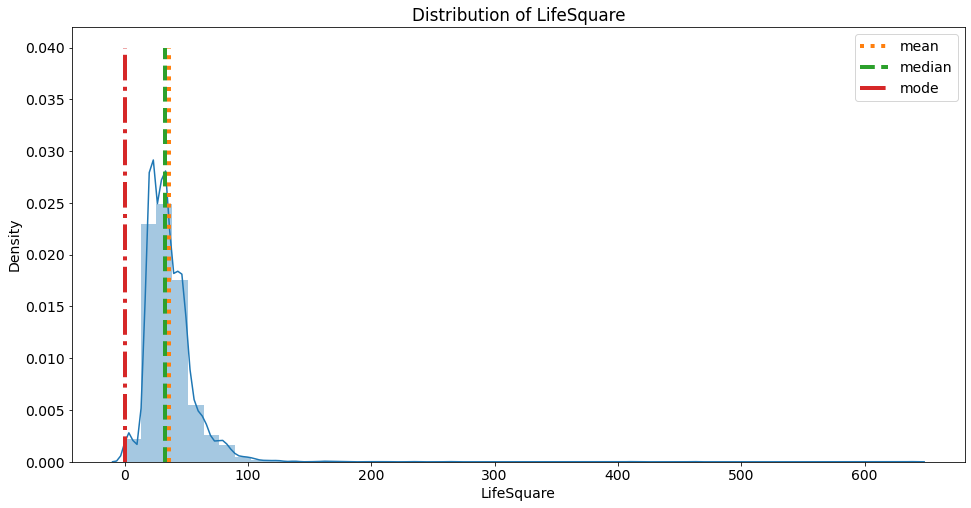

In [99]:
plt.figure(figsize = (16, 8))

sns.distplot(df_train['LifeSquare'], bins=50)

y = np.linspace(0, 0.04, 10)
plt.plot([LifeSquare_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([LifeSquare_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([LifeSquare_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of LifeSquare')
plt.legend()
plt.show()

In [100]:
Healthcare_1_mean = round(df_train['Healthcare_1'].mean(), 2)
Healthcare_1_median = df_train['Healthcare_1'].median()
Healthcare_1_mode = df_train['Healthcare_1'].mode()[0]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


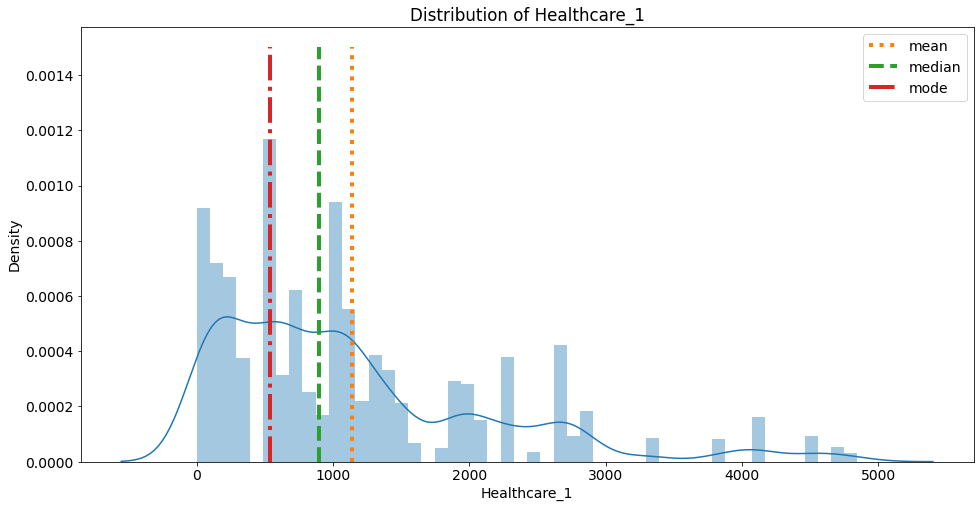

In [101]:
plt.figure(figsize = (16, 8))

sns.distplot(df_train['Healthcare_1'], bins=50)

y = np.linspace(0, 0.0015, 10)
plt.plot([Healthcare_1_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([Healthcare_1_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([Healthcare_1_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Healthcare_1')
plt.legend()
plt.show()

In [102]:
df_train['Healthcare_1'] = df_train['Healthcare_1'].fillna(df_train['Healthcare_1'].median())
df_train['LifeSquare'] = df_train['LifeSquare'].fillna(df_train['LifeSquare'].mean())

In [103]:
df_train.isna().sum()

DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

**В датафрейме у нас присутствуют категориальные признаки, посмотрим распределение на графиках и заменим значения на 0 и 1**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


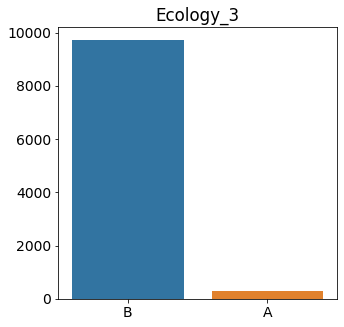

In [104]:
counts = df_train['Ecology_3'].value_counts() 
plt.figure(figsize=(5,5))    
plt.title('Ecology_3')
sns.barplot(counts.index, counts.values)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


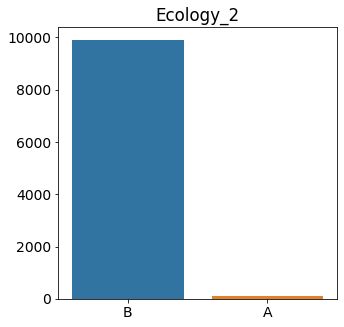

In [105]:
counts = df_train['Ecology_2'].value_counts() 
plt.figure(figsize=(5,5))    
plt.title('Ecology_2')
sns.barplot(counts.index, counts.values)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


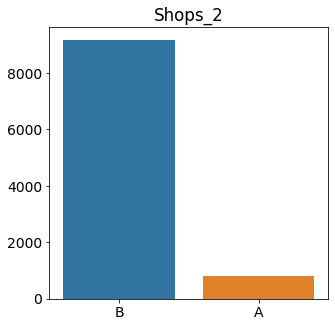

In [106]:
counts = df_train['Shops_2'].value_counts() 
plt.figure(figsize=(5,5))    
plt.title('Shops_2')
sns.barplot(counts.index, counts.values)

In [107]:
df_train.loc[(df_train['Ecology_2'] == 'B'), 'Ecology_2'] = 1
df_train.loc[(df_train['Ecology_3'] == 'B'), 'Ecology_3'] = 1
df_train.loc[(df_train['Shops_2'] == 'B'), 'Shops_2'] = 1
df_train.loc[(df_train['Ecology_2'] == 'A'), 'Ecology_2'] = 0
df_train.loc[(df_train['Ecology_3'] == 'A'), 'Ecology_3'] = 0
df_train.loc[(df_train['Shops_2'] == 'A'), 'Shops_2'] = 0

In [108]:
df_train["Ecology_2"] = df_train['Ecology_2'].astype('int')
df_train["Ecology_3"] = df_train['Ecology_3'].astype('int')
df_train["Shops_2"] = df_train['Shops_2'].astype('int')

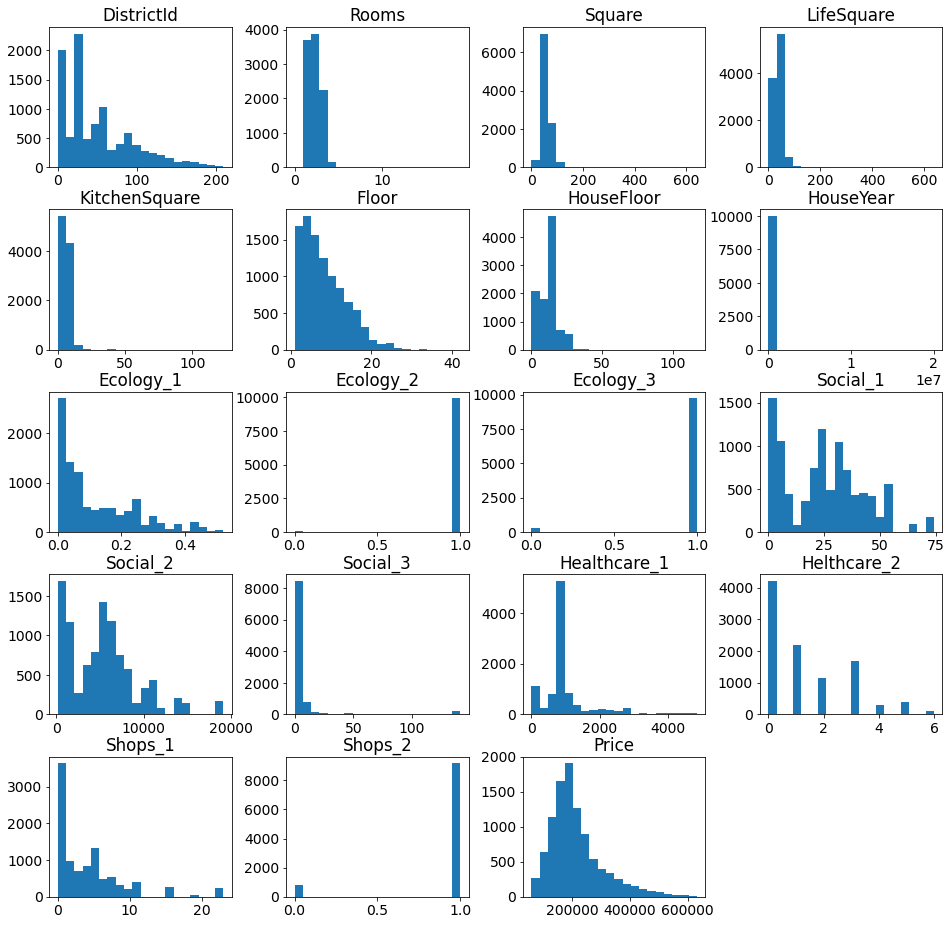

In [109]:
df_train.hist(figsize=(16,16), bins=20, grid=False);

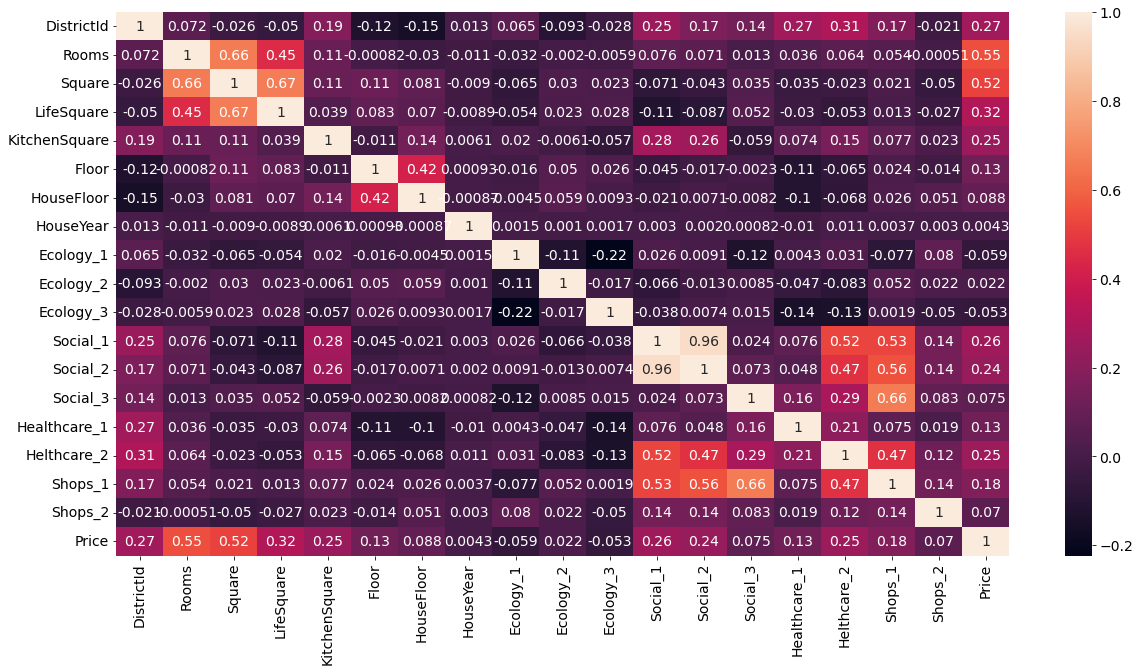

In [110]:
plt.figure(figsize = (20,10))
sns.heatmap(df_train.corr(),annot = True)

In [111]:
## высокая корреляция между Social_1 и Social_2, однако как показало в дальнейшем удаление одного из столбцов уменьшает точность модели
##df = df.drop(columns='Social_2')

## Обучение

In [112]:
df_train.columns.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price']

In [113]:
feature_names = ['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2']

In [114]:
target_name = 'Price'

**Стандартизируем признаки (хотя для нашей модели это не обязательно)**

In [115]:
sc = StandardScaler()
for feature in feature_names:
    df_train[feature] = sc.fit_transform(np.array(df_train[feature]).reshape(-1,1))

df_train

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,-0.353266,0.130366,-0.395817,-0.378435,0.023856,-0.291402,-0.533069,-0.010083,-0.250733,0.098985,0.168185,0.473951,0.654635,-0.127613,-0.169302,-0.883714,1.408124,0.299715,184966.930730
1,-0.215621,1.321653,0.444828,0.210654,0.410381,-0.291402,-0.533069,-0.010038,-0.998211,0.098985,0.168185,1.215479,1.236920,-0.295441,-1.053161,-0.213876,2.448400,0.299715,300009.450063
2,0.059671,0.130366,-0.539878,-0.392050,-1.135721,-0.100614,-0.090233,-0.010088,-0.581772,0.098985,0.168185,0.530991,0.600474,-0.337398,-1.067892,-0.213876,-0.256318,0.299715,220925.908524
3,0.174376,0.130366,-0.140736,0.914996,0.603644,-0.100614,0.647827,-0.010043,2.680087,0.098985,0.168185,-0.096456,0.095311,-0.211527,0.077107,-0.883714,0.159793,0.299715,175616.227217
4,1.114957,-1.060921,-0.791508,-0.693150,0.217119,0.471751,-0.090233,-0.010048,-0.895134,0.098985,0.168185,0.588032,0.105544,-0.295441,1.408252,0.455961,-0.048262,0.299715,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.422089,0.130366,-0.280884,-0.321038,-0.169407,-0.482190,-1.123516,-0.010088,0.140861,0.098985,0.168185,1.215479,0.650641,-0.085656,-0.905851,1.125799,1.408124,0.299715,196684.316040
9996,-0.743263,-1.060921,-0.702593,-0.872927,0.603644,0.853327,0.057379,-0.009928,-0.998799,0.098985,0.168185,0.302829,0.052132,-0.337398,-0.169302,-0.883714,0.159793,-3.336507,189050.289571
9997,-0.536794,-1.060921,-0.397837,0.000000,-0.942458,0.662539,0.500215,-0.009853,-0.392568,0.098985,0.168185,-1.294310,-1.179079,-0.295441,-0.169302,-0.883714,-0.880483,-3.336507,159143.805370
9998,0.564373,0.130366,-0.603769,-0.134209,0.410381,-1.436131,-1.123516,-0.010122,1.584377,0.098985,-5.945816,0.302829,-0.076155,0.040215,-0.939331,0.455961,0.159793,0.299715,181595.339808


**Построим модель на тренировочных данных и посмотрим результат обучения**

In [116]:
X = df_train[feature_names]
y = df_train[target_name]

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(6997, 18)
(3000, 18)


***Лучшие результаты показала модель RandomForestRegressor, используем ее с определенными фичами***

In [118]:
model = RandomForestRegressor(n_estimators=1200, max_depth=30, max_features = 0.3, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, max_features=0.3, n_estimators=1200,
                      random_state=42)

In [119]:
y_train_preds = model.predict(X_train)
print('R2 score on training data: {:.2f}%'.format(100*r2_score(y_train, y_train_preds)))

R2 score on training data: 96.34%


In [120]:
y_pred = model.predict(X_test)
print('R2 score on testing data: {:.2f}%'.format(100*r2_score(y_test, y_pred)))

R2 score on testing data: 75.53%


**Посмотрим важность признаков**

In [121]:
feat_imp = model.feature_importances_
feat_imp

array([0.05142036, 0.11893987, 0.257202  , 0.09070018, 0.04562665,
       0.03247862, 0.03073527, 0.04347743, 0.03861584, 0.00045073,
       0.00119537, 0.07172404, 0.0732045 , 0.06502507, 0.0296736 ,
       0.02035711, 0.02767549, 0.00149786])

In [122]:
np.sum(feat_imp)

1.0

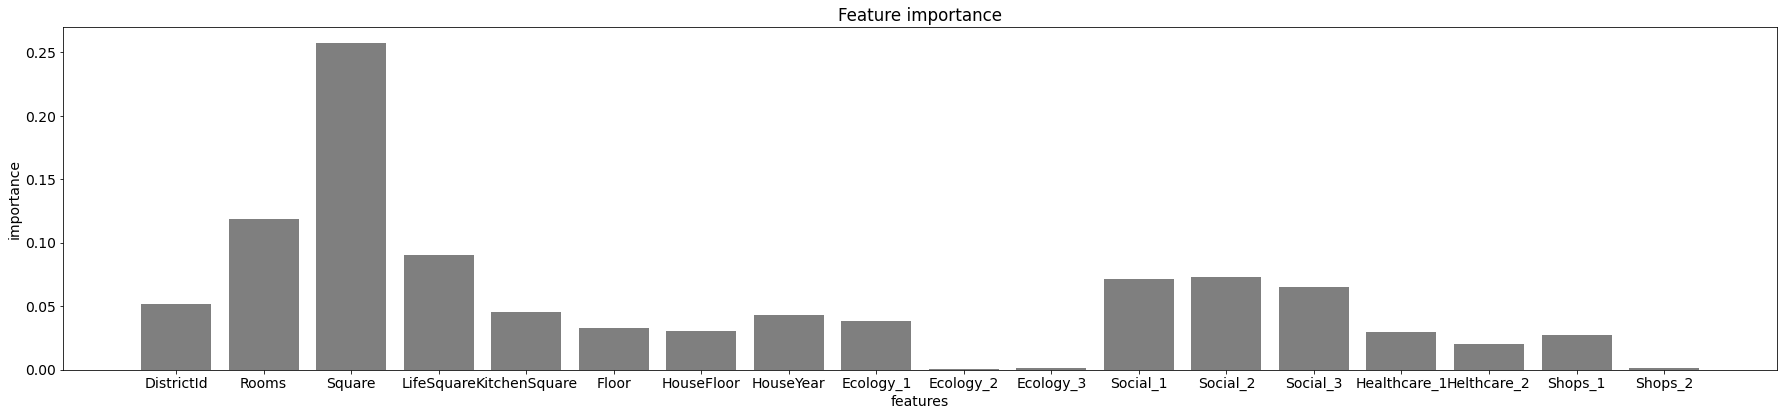

In [123]:
plt.figure(figsize=(25, 6))
index = np.arange(len(feature_names))
plt.bar(index, feat_imp, color='black', alpha=0.5)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Feature importance')
plt.xticks(index, np.array(feature_names))
plt.tight_layout()
plt.show()

**Модель показала 96% на тренировочных данных и 75,5% на тестовых. Посмотрим какие фичи нам предложит оставить RFECV (можно пропустить, занимает время, итог - модель улучшить не удалось)**

##RFECV

In [124]:
from sklearn.feature_selection import RFECV

In [125]:
rfecv = RFECV(estimator=RandomForestRegressor(), step=1, cv=5) 
rfecv.fit(X_train, y_train)

RFECV(cv=5, estimator=RandomForestRegressor())

In [126]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 14


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


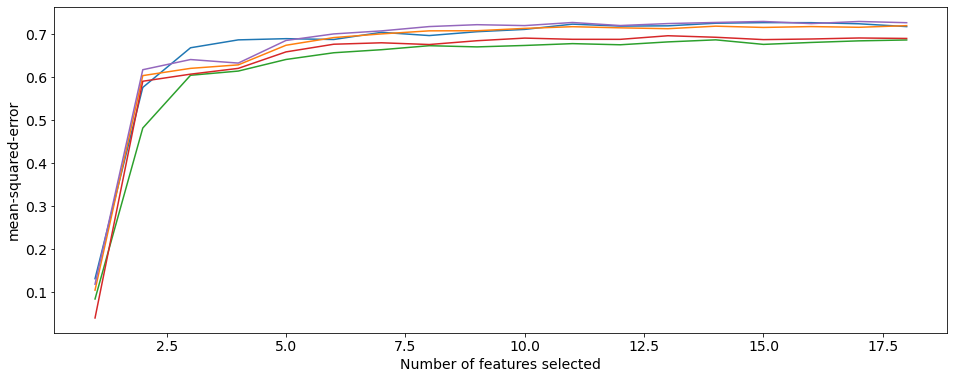

In [127]:
plt.figure(figsize=(16, 6)) 
plt.xlabel("Number of features selected") 
plt.ylabel("mean-squared-error") 
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

In [128]:
df_features = pd.DataFrame(columns = ['feature', 'support', 'ranking'])

for i in range(X.shape[1]):
    row = {'feature': i, 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i]}
    df_features = df_features.append(row, ignore_index=True)
    
df_features.sort_values(by='ranking')

,feature,support,ranking
0,0,True,1
14,14,True,1
13,13,True,1
12,12,True,1
11,11,True,1
16,16,True,1
7,7,True,1
8,8,True,1
5,5,True,1
4,4,True,1


In [129]:
selected_features = rfecv.get_support(1)
X_train_new = X_train[df_train.columns[selected_features]]

In [130]:
model2 = RandomForestRegressor() 
model2.fit(X_train_new, y_train)

RandomForestRegressor()

In [131]:
predicted = model2.predict(X_train_new)
print('R2 score on training data: {:.2f}%'.format(100*r2_score(y_train, predicted)))

R2 score on training data: 96.02%


In [132]:
X_test_new = X_test[df_train.columns[selected_features]]

In [133]:
y_predicted = model2.predict(X_test_new)
print('R2 score on testing data: {:.2f}%'.format(100*r2_score(y_test, y_predicted)))

R2 score on testing data: 74.21%


**Модель улeчшить не удалось**

## Предсказание цены в тестовом датафрейме

In [134]:
df_test.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


**Очистим его также как и тренировочный**

In [135]:
df_test=df_test.drop(labels='Id',axis=1)
df_test["Rooms"] = df_test['Rooms'].astype('int')
df_test["Floor"] = df_test['Floor'].astype('int')
df_test["HouseFloor"] = df_test['HouseFloor'].astype('int')
df_test['Healthcare_1'] = df_test['Healthcare_1'].fillna(df_test['Healthcare_1'].median())
df_test['LifeSquare'] = df_test['LifeSquare'].fillna(df_test['LifeSquare'].mean())
df_test.loc[(df_test['Ecology_2'] == 'B'), 'Ecology_2'] = 1
df_test.loc[(df_test['Ecology_3'] == 'B'), 'Ecology_3'] = 1
df_test.loc[(df_test['Shops_2'] == 'B'), 'Shops_2'] = 1
df_test.loc[(df_test['Ecology_2'] == 'A'), 'Ecology_2'] = 0
df_test.loc[(df_test['Ecology_3'] == 'A'), 'Ecology_3'] = 0
df_test.loc[(df_test['Shops_2'] == 'A'), 'Shops_2'] = 0
df_test["Ecology_2"] = df_test['Ecology_2'].astype('int')
df_test["Ecology_3"] = df_test['Ecology_3'].astype('int')
df_test["Shops_2"] = df_test['Shops_2'].astype('int')

In [136]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   int64  
 2   Square         5000 non-null   float64
 3   LifeSquare     5000 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   int64  
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   int64  
 10  Ecology_3      5000 non-null   int64  
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   5000 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   int64  
dtypes: float

**Добавим новый столбец prediction**

In [137]:
df_test['prediction'] = np.nan
df_test['prediction'] = df_test['prediction'].fillna(0)

In [138]:
df_test.head(5)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,prediction
0,58,2,49.882643,33.432782,6.0,6,14,1972,0.310199,1,1,11,2748,1,900.0,0,0,1,0.0
1,74,2,69.263183,36.158810,1.0,6,1,1977,0.075779,1,1,6,1437,3,900.0,0,2,1,0.0
2,190,1,13.597819,15.948246,12.0,2,5,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1,0.0
3,47,2,73.046609,51.940842,9.0,22,22,2007,0.101872,1,1,23,4583,3,900.0,3,3,1,0.0
4,27,1,47.527111,43.387569,1.0,17,17,2017,0.072158,1,1,2,629,1,900.0,0,0,0,0.0


In [139]:
predictions = model.predict(df_test.drop(columns={'prediction'}))
df_test['prediction'] = predictions

In [140]:
df_test

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,prediction
0,58,2,49.882643,33.432782,6.0,6,14,1972,0.310199,1,1,11,2748,1,900.0,0,0,1,357729.547699
1,74,2,69.263183,36.158810,1.0,6,1,1977,0.075779,1,1,6,1437,3,900.0,0,2,1,360487.733581
2,190,1,13.597819,15.948246,12.0,2,5,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1,350628.232695
3,47,2,73.046609,51.940842,9.0,22,22,2007,0.101872,1,1,23,4583,3,900.0,3,3,1,364988.231415
4,27,1,47.527111,43.387569,1.0,17,17,2017,0.072158,1,1,2,629,1,900.0,0,0,0,332409.865443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,3,67.133911,50.809797,6.0,5,9,1973,0.000170,1,1,36,5992,0,900.0,1,1,1,368199.339996
4996,1,1,40.198472,21.807061,10.0,12,17,2017,0.007122,1,1,1,264,0,900.0,0,1,1,355528.757553
4997,12,3,77.842178,48.282625,9.0,23,22,1989,0.090799,1,1,74,19083,2,900.0,5,15,1,361595.950940
4998,62,2,81.305222,36.158810,0.0,4,0,1977,0.072158,1,1,2,629,1,900.0,0,0,0,377952.000063


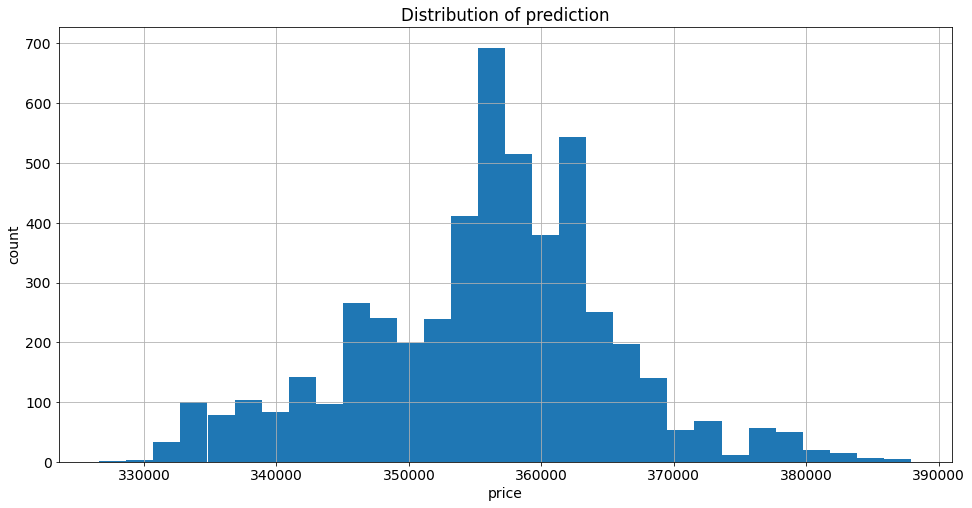

In [141]:
plt.figure(figsize = (16, 8))

df_test['prediction'].hist(bins=30)
plt.ylabel('count')
plt.xlabel('price')

plt.title('Distribution of prediction')
plt.show()